/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


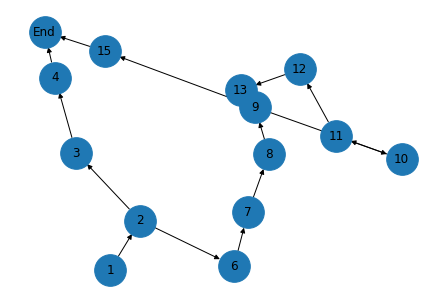

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(1,2), (2,3), (2,6), (3,4), (4,"End"), 
                 (6,7), (7,8), (8,9), (9,10), (9,15), 
                 (10,11), (11,12), (12,13), (13,9), (15,"End")])
nx.draw(G, with_labels=True, node_size=1000, arrows=True)
plt.show()